# **Import Libraries and modules**

###Third Revision:</br>
###Updates:</br>
* Introducing scheduled Learning rate</br>
* Increasing batch size to 128</br>
* Added one convolution layer at image size 7x7, so that the biggest kernal used is reduced to 5x5</br>
###Summary:</br>
Parameters reduced to 15,590</br>
###Accuracy increased to 99.42</br></br>
No.of Epochs 30</br>


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


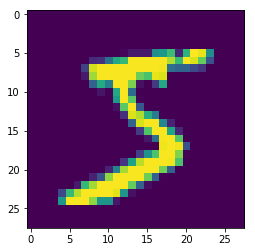

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [35]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_std_normalization=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train, Y_train, batch_size=32, shuffle=False)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [37]:
from keras.layers import Activation, MaxPooling2D,BatchNormalization,Dropout,ReLU
from keras.optimizers import Adam

model = Sequential() 

model.add(Convolution2D(10, 3, 3, input_shape=(28,28,1),use_bias=False,name='layer1'))#......26......rf3....
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3,use_bias=False,name='layer2',kernel_regularizer=keras.regularizers.l2(0.01)))#......24......rf5....
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1 ,1, use_bias=False,name='layer5',kernel_regularizer=keras.regularizers.l2(0.01)))#......12......rf14....
model.add(ReLU())

model.add(Convolution2D(16, 3, 3, use_bias=False,name='layer6',kernel_regularizer=keras.regularizers.l2(0.01)))#......8......rf16....
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, use_bias=False,name='layer7',kernel_regularizer=keras.regularizers.l2(0.01)))#......6......rf18....
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, use_bias=False,name='layer8',kernel_regularizer=keras.regularizers.l2(0.01)))#......4......rf18....
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3, use_bias=False,name='final',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(ReLU())
model.add(Convolution2D(10, 4, 4,use_bias=False,name='layer9'))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., use_bias=False, name="layer1")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, name="layer2", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), use_bias=False, name="layer5", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, name="layer6", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
re_lu_16 (ReLU)              (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 24, 24, 16)        1440      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
re_lu_17 (ReLU)              (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, name="layer8", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, name="final", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False, name="layer9")`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [39]:
model.fit_generator(iterator,nb_epoch=60,steps_per_epoch=len(iterator), verbose=1,validation_data=(X_test, Y_test),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=1875, verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., epochs=60)`
  """Entry point for launching an IPython kernel.


Epoch 1/60

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4695 - acc: 0.9209 - val_loss: 2.6220 - val_acc: 0.1730
Epoch 2/60

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2507 - acc: 0.9590 - val_loss: 5.3250 - val_acc: 0.1136
Epoch 3/60

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2193 - acc: 0.9627 - val_loss: 4.8726 - val_acc: 0.1240
Epoch 4/60

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1938 - acc: 0.9665 - val_loss: 5.8381 - val_acc: 0.1135
Epoch 5/60

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1701 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [45]:
print(score)

[10.387421775817872, 0.1135]


In [0]:
y_pred = model.predict(X_test)

In [43]:
weights = model.get_variable_value()

AttributeError: ignored

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(layer_name,img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print(layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x,plot_y, figsize = (12, 12))
    reshape = img.reshape((28, 28))
    ax[0, 0].imshow(reshape, cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name= 'layer3')

In [0]:
vis_img_in_filter(layer_name= 'layer6')